# Aula 06 - Aplicação do k-means

O `Scikit-learn` tem um artigo ([este aqui](https://scikit-learn.org/stable/modules/clustering.html#k-means)) detalhando o funcionamento do `k-means`, e é muito recomendável a sua leitura, pois mostra que, apesar de ser simples, existe muita teoria por trás do algoritmo. Além do artigo, existe também a [documentação](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) da implementação do algoritmo. A seguir um resumo dos principais parâmetros:

* **n_clusters**: a quantidade de cluster desejada, ou seja, o valor de $k$. Se não for definido, o algoritmo escolhe o valor $8$ por padrão.
* **init**: como os centroides serão inicializados. Por padrão é um método chamado `k-means++` que ajuda em um melhor posicionamento inicial dos centroides. Portém, caso você queira uma inicialização aleatória, basta escrever o parâmetro da seguinte forma: `init = 'random'`.
* **n_init**: a quantidade de vezes que o `k-means` será executado com *seeds* para centroides diferentes, ou seja, com inicializações diferentes, e terá como retorno a melhor execução em termos de `inércia`. Por padrão o parâmetro recebe o valor `'auto'` que resultará em 10 execuções se o parâmetro `init` estiver configurado como `'random'`. Senão, será o valor `1`. Mas caso você queira utilizar outro valor, basta passar um número inteiro.
* **max_iter**: quantidade máxima de iterações, ou seja, a quantidade máxima de vezes que os centroides serão ajustados. Em algumas situações a `convergência` pode demorar a acontecer e, por isso, é interessante definirmos um limite de tentativas. Por padrão, o valor deste parâmetro é **300**.
* **tol**: determina a tolerância da variância para que seja admitida a convergência do resultado. Por padrão, o valor é 0.0001.
* **verbose**: configura a quantidade de informação da execução a ser mostrada ao usuário. Por padrão é 0, ou seja, com pouca ou nenhuma informação. Valores inteiros maiores resultarão em mais informação sobre a execução.
* **random_state**: já vimos este parâmetro várias vezes na **aula05**. Para que os resultados, inclusive os dependentes de aleatoriedade, possam ser repetidos, escolhemos um valor de `seed`. Na **aula05** era sempre 42. Por padrão o valor deste parâmetro é `None`.
* **copy_x**: valor booleano. Caso seja `True` os dados originais não serão manipulados durante as iterações, preservando o resultado de pequenas variações durante o cálculo que poderiam atrasar o algoritmo.
* **algorithm**: tem por padrão o algoritmo `lloyd`, o nome do algoritmo do `k-means`. O outro valor possível para este parâmetro é `elkan`, o qual pode ser mais eficiente em bases de dados com *clusters* bem definidos, porém é mais custoso em termos de memória.

De início não há necessidade de se entender todos os parâmetros e quando cada um deve ser ajustado. Para nosso caso, bastam os parâmentros `n_cluster`, `max_iter` e `verbose` (e esse é mais por curiosidade).

## Exemplo básico

Vamos criar um conjunto de dados simples e executar o `k-means`.

In [1]:
from sklearn import datasets as ds
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

# Criando uma base de dados aleatória e simples com as seguintes características (seguindo o livro):
#   n = 100 objetos
#   k = 4 grupos
#   X = 2 atributos
#   mu(média) = 0
#   std = 1,3 (desvio padrão)
X, y = ds.make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1.3)

# Inicializando o k-means
km = KMeans(n_clusters=4, random_state=50) # random_state para ter resultados como os do livro
km.fit(X)
prevs = km.predict(X)

In [2]:
# Criando um DataFrame para o conjunto de dados original com seu atributo alvo, e o outro DataFrame com o atributo alvo previsto pelo k-means
originalDF = pd.DataFrame(data=X, columns=['Atributo1', 'Atributo2'])
kmDF = originalDF.copy()

originalDF['Target'] = y
kmDF['Target'] = prevs

<Axes: xlabel='Atributo1', ylabel='Atributo2'>

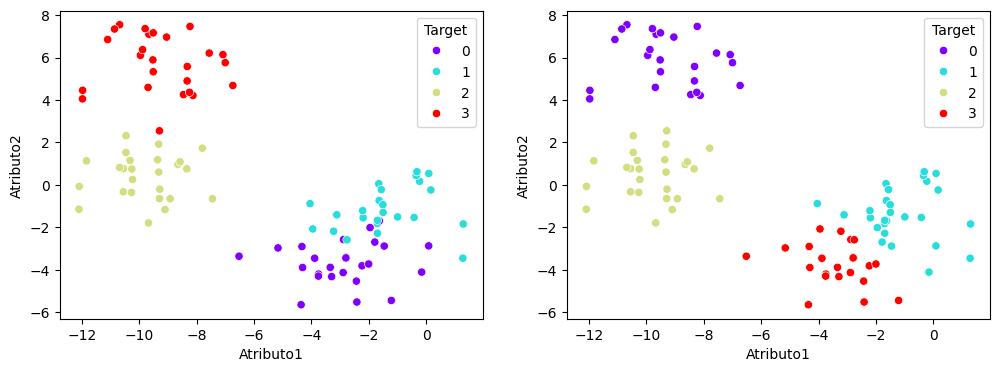

In [4]:
# Criando os plots para comparação
fig, axes = plt.subplots(1, 2, figsize=(12,4))
sb.scatterplot(data=originalDF, x='Atributo1', y='Atributo2', hue='Target', palette='rainbow', ax=axes[0])
sb.scatterplot(data=kmDF, x='Atributo1', y='Atributo2', hue='Target', palette='rainbow', ax=axes[1])

In [6]:
# Vamos agora calcular a silhueta
from sklearn.metrics import silhouette_score

silhouette_score(originalDF, prevs)

np.float64(0.5021630133501465)

Lembrando que, quanto mais próximo de 1, melhor o resultado da `silhueta`.

### Desafios

1. Procurem e utilizem 2 bases de dados e executem o `k-means`, calculando o valor da métrica `silhueta`.
2. Procurem no Teams as dissertações que disponibilizei. Procurem nas dissertações outras métricas utilizadas e verifiquem nas bases que vocês pegaram.